<a href="https://colab.research.google.com/github/Rayley001/Rayley001/blob/main/Data201Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2**
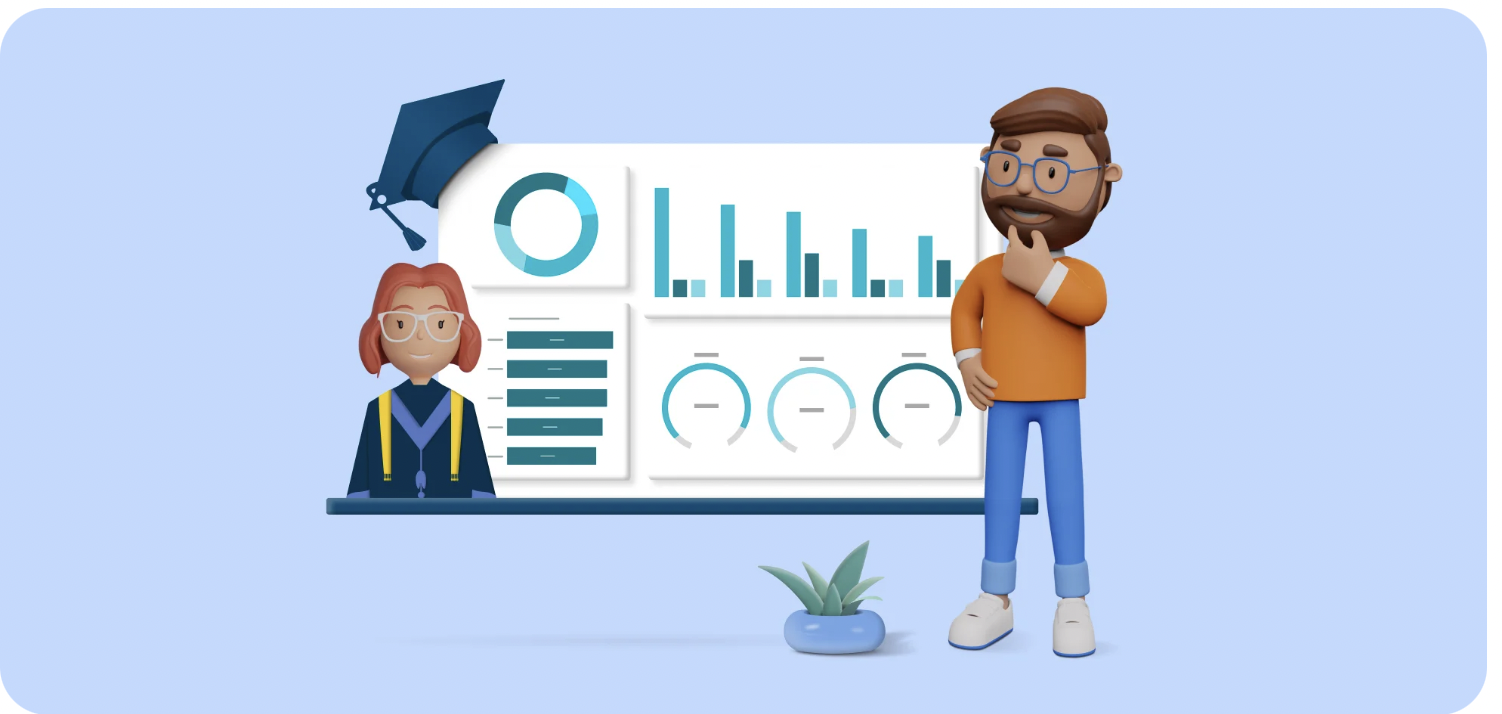

1. Introdution

For my second project I will explore a dataset about student performances. This dataset has about 10 000 rows and it explore factors that can affect students academic performances. We have variables like sleep hours, Hours Studied, Performance Index and more.



2. Prepare and wrangle my data.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df = pd.read_csv('/content/drive/My Drive/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


It looks like my dataset doesn't have missing values.

3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data

In [22]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [23]:
df.shape # my dataset has 10 000 rows and 6 columns

(10000, 6)

In [24]:
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


* Plot of extracurricular activities count

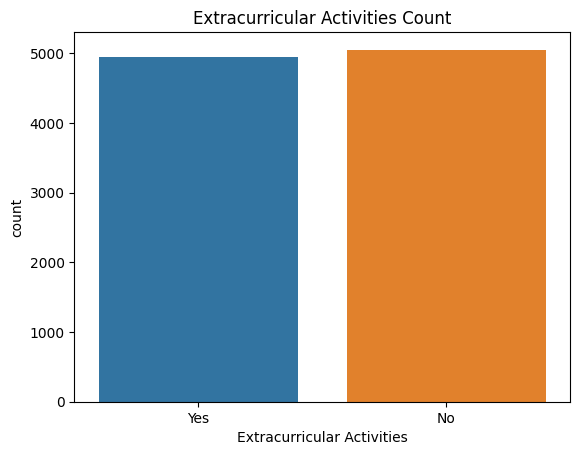

In [25]:
sns.countplot(x='Extracurricular Activities', data=df, hue='Extracurricular Activities')
plt.title('Extracurricular Activities Count')
plt.xlabel('Extracurricular Activities')
plt.show()

In [26]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


4. Use scikit-learn linear regression to train, test and predict a numerical target
variable. Use appropriate metric and interpret the meaning of the score.

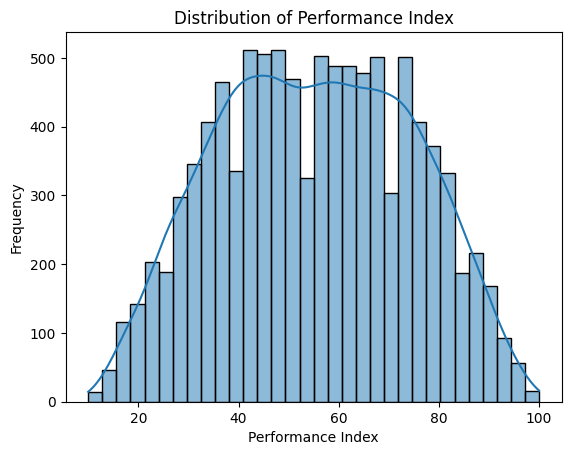

In [27]:
sns.histplot(df['Performance Index'], kde=True)  # kde adds a kernel density estimate curve
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

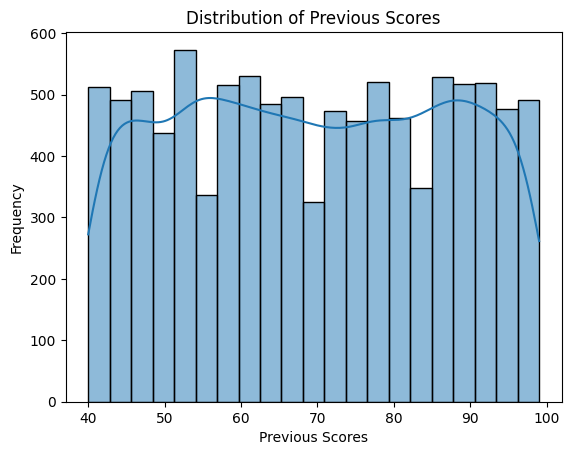

In [28]:
sns.histplot(df['Previous Scores'], kde=True)  # kde adds a kernel density estimate curve
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')
plt.show()

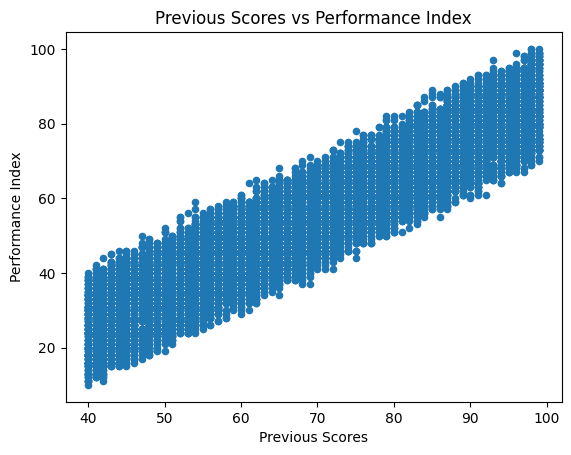

In [17]:
df.plot(kind='scatter', x='Previous Scores', y='Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

Split the data

In [29]:
# Define my variables:
x = df[['Previous Scores']]
y = df['Performance Index']

#Test train split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#X_train = df_train[['Previous Scores']]
#y_train = df_train['Performance Index']
#X_test = df_test[['Previous Scores']]
#y_test = df_test['Performance Index']

model=LinearRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# Evaluation of metric
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Or use numpy: np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Model coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

Mean Squared Error: 58.94905984921965
Root Mean Squared Error: 7.677829110446497
R-squared: 0.8409297694265205
Intercept (b0): -15.10443514609134
Coefficients (b1, b2): [1.0127272]


5. Plot histogram of residual

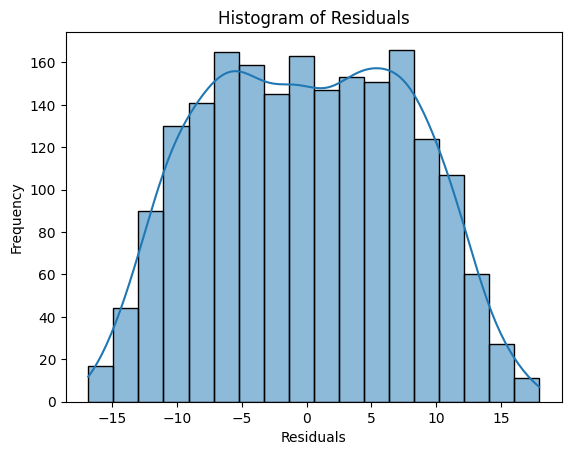

In [30]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The distribution looks approximately normal it has a Gaussian distribution.

 6. scatterplot of predicted values and residuals to check assumption of
homoscedasticity

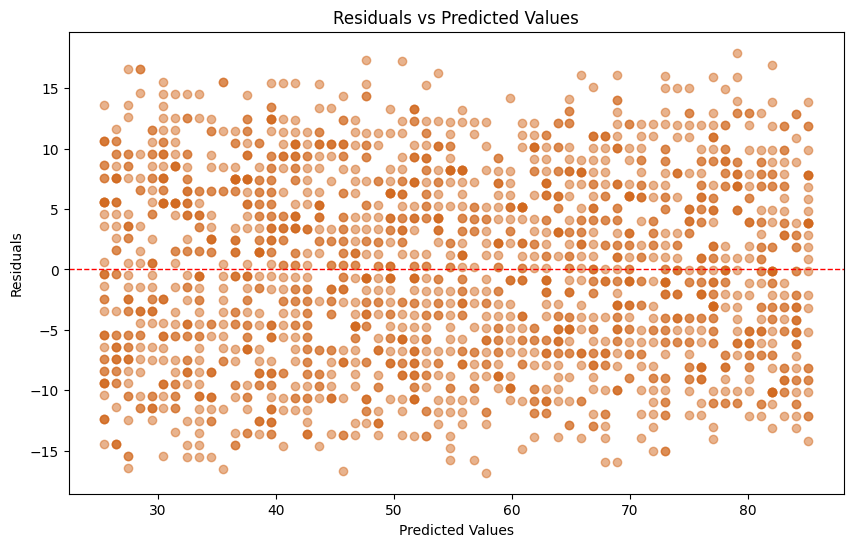

In [48]:
# residual
residuals = y_test - y_pred

# Scatterplot of residual vs predicted value
plt.figure(figsize=(10, 6))
plt.scatter(y_pred,residuals, alpha=0.5, color= 'chocolate')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.show()

The spread of residual value seems consistent across the range of predicted value indicating homoscedasticity.

7. Interpret the coefficients of the linear regression

In [50]:
coefficients= model.coef_
intercept= model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [1.0127272]
Intercept: -15.10443514609134


**Coefficients** = 1.0127, this is the slope of the regression line . For every 1 point increase in "Previous Scores, the "Performances Index increases by 1.0127.

**Intercept** = -15.104 is the predited value for performance index if a student has 0.


***Linear regression equation***:
Performance Index= 1.0127 * Previous Scores - 15.104

**Conclusion**:

To finish this project from this data set I get that student with higher Previous scores tend to get higher Performances Index.

Link to the image: https://www.boldbi.com/blog/educational-insights-analyzing-student-performance-with-bi-dashboards/
